# Policy
* 이 노트북 파일은 중간 과제를 재현Reproduce하는 증거로 활용.
    * 따라서, 이 노트북에 기재된 코드를 실행했을 때, Kaggle에 제출한 결과와 일치해야함
    * 무작위성 등으로 인하여 결과가 매번 달라지는 경우에는 Random Seed 등을 설정해서 항상 같은 결과가 나오도록 할 것(예. scikit-learn의 **random_state** 등)
* 다음과 같은 정책을 어길 시 0점 처리되니 유의할 것
    * 노트북에 기재된 코드를 전체 실행했을 때 오류 등으로 실행이 되지 않는 경우
    * 노트북에 명시되지 않은 별도의 코드 및 라이브러리를 사용하는 경우
        * 과제 수행에 필요한 외부 라이브러리 설치 명령은 이 노트북 내에 명시할 것(Installing Libraries 참조)
        * 별도의 Python 파일은 사용하지 말 것. 필요하다면 이 노트북 내에서 구현.
    * 중간 과제에서 제공한 데이터 이외의 별도의 데이터를 사용하는 경우
    * 노트북 파일 내에서 훈련된 모델이 아닌 다른 모델을 사용하는 경우
    * Kaggle 제출 결과와 노트북 파일 실행으로 나온 결과가 크게 다를 경우

# Installing Libraries

아래에 중간 과제를 수행하는 데 필요한 라이브러리 들을 설치하는 명령어를 넣을 것
예를 들어,
```shell
%conda install sklearn
```
또는
```shell
%pip install -U sklearn
```
버전이 중요하다면, 버전도 명확하게 명시할 것
```shell
%conda install sklearn==1.4.2
```
또는
```shell
%pip install sklearn==1.4.2
```

In [41]:
# 설치하는 라이브러리 명시
!pip  install -q scikit-learn numpy pandas kaggle tensorflow==2.10.0 keras==2.10.0 pillow torch matplotlib scipy --ignore-installed

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\hailab\\anaconda3\\envs\\cuda\\Lib\\site-packages\\torch\\lib\\uv.dll'
Consider using the `--user` option or check the permissions.



In [42]:
import pandas as pd
import json
import numpy as np
import os
import shutil
from PIL import Image
from scipy.interpolate import interp1d
from scipy.signal import butter, filtfilt, medfilt
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import balanced_accuracy_score
from scipy.signal import butter, filtfilt, medfilt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout,Conv2D, MaxPooling2D
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import shutil
import keras
from keras.layers import Input, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
import random
import torch
from tensorflow.keras import layers, models

# Data Load
아래에 중간 과제에 활용할 데이터를 불러오는 부분을 넣을 것

In [3]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [4]:
USERNAME = "liebenholz" # username
USERKEY = "" # key
json.dump({'username': USERNAME, 'key': USERKEY}, open('kaggle.json', mode='w'))

In [5]:
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c 2024-knu-ml-team-asmt
!unzip -o -qq 2024-knu-ml-team-asmt.zip

In [7]:
test_accel  = pd.read_csv(r'/Users/gokyulueau/Downloads/test_accel.csv',index_col='time',usecols=['x','y','z','time'])
test_gyro   = pd.read_csv(r'/Users/gokyulueau/Downloads/test_gyro.csv',index_col='time',usecols=['x','y','z','time'])
train_accel = pd.read_csv(r'/Users/gokyulueau/Downloads/train_accel.csv',index_col='time',usecols=['x','y','z','time'])
train_gyro  = pd.read_csv(r'/Users/gokyulueau/Downloads/train_gyro.csv',index_col='time',usecols=['x','y','z','time'])
train_label = pd.read_csv(r'/Users/gokyulueau/Downloads/train_label.csv',index_col='id',usecols=['id','workout'])
submmision  = pd.read_csv(r'/Users/gokyulueau/Downloads/sample_submission.csv',index_col='id',usecols=['id','workout'])
train_label

,workout
id,
14404.0,1
14405.0,1
14406.0,1
14407.0,1
14408.0,1
...,...
140624.0,8
140625.0,8
140626.0,8


# Data Preprocessing, Feature Engineering, and Model Building

이곳부터는 데이터 전처리, 특성값 공학, 모델 훈련 등의 코드를 자유롭게 넣을 것

In [8]:
submmision = submmision.sort_index()

In [9]:
test_accel  .columns = ['acc_x','acc_y','acc_z']
test_gyro   .columns = ['gyro_x','gyro_y','gyro_z']
train_accel .columns = ['acc_x','acc_y','acc_z']
train_gyro  .columns = ['gyro_x','gyro_y','gyro_z']

In [10]:
test_accel  .index = pd.to_datetime(test_accel.index, unit='s')
test_gyro   .index = pd.to_datetime(test_gyro.index, unit='s')
train_accel .index = pd.to_datetime(train_accel.index, unit='s')
train_gyro  .index = pd.to_datetime(train_gyro.index, unit='s')
train_label .index = pd.to_datetime(train_label.index, unit='s')
submmision  .index = pd.to_datetime(submmision.index, unit='s')

In [11]:
saved_test_accel= test_accel.copy()
saved_test_gyro= test_gyro.copy()
saved_train_accel= train_accel.copy()
saved_train_gyro= train_gyro.copy()
test_label = submmision.copy()

In [12]:
train_label

,workout
id,
1970-01-01 04:00:04,1
1970-01-01 04:00:05,1
1970-01-01 04:00:06,1
1970-01-01 04:00:07,1
1970-01-01 04:00:08,1
...,...
1970-01-02 15:03:44,8
1970-01-02 15:03:45,8
1970-01-02 15:03:46,8


In [13]:
###  저장된 변수 재 할당
###
###   오류 발생하면 여기서부터 누르기
###
###
test_accel  = saved_test_accel .ffill().dropna().resample('20ms').nearest()
test_gyro   = saved_test_gyro  .ffill().dropna().resample('20ms').nearest()
train_accel = saved_train_accel.ffill().dropna()
train_accel = train_accel[~train_accel.index.duplicated()]
train_accel = train_accel.resample('20ms').nearest()
train_gyro  = saved_train_gyro .ffill().dropna()
train_gyro  = train_gyro [~train_gyro.index.duplicated()]
train_gyro  = train_gyro .resample('20ms').nearest()
train_label = train_label.ffill().dropna()

In [14]:
merge_train=pd.concat([train_accel,train_gyro,train_label],axis=1)
merge_train = merge_train.ffill().bfill().dropna()
merge_train

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,workout
1970-01-01 04:00:00.000,9.561121,-1.004985,0.528814,-0.108123,0.051771,-0.010614,1.0
1970-01-01 04:00:00.020,9.561121,-1.004985,0.528814,-0.099266,0.017104,-0.013821,1.0
1970-01-01 04:00:00.040,9.847662,-1.066002,0.537787,-0.085368,0.007483,-0.031078,1.0
1970-01-01 04:00:00.060,10.068997,-0.942174,0.417548,-0.080481,0.025809,-0.062079,1.0
1970-01-01 04:00:00.080,10.007980,-0.473181,0.158524,-0.096517,0.043371,-0.089415,1.0
...,...,...,...,...,...,...,...
1970-01-03 13:05:47.320,9.645791,1.037942,-1.692231,-0.502796,0.148568,0.307702,8.0
1970-01-03 13:05:47.340,9.724827,1.337768,-1.817820,-0.447577,0.169449,0.273753,8.0
1970-01-03 13:05:47.360,9.534423,1.260379,-1.583258,-0.489751,0.213795,0.263714,8.0
1970-01-03 13:05:47.380,9.550290,0.978815,-1.506617,-0.594105,0.220150,0.281765,8.0


In [15]:
merge_test=pd.concat([test_accel,test_gyro],axis=1)
merge_test = merge_test.ffill().bfill().dropna()
merge_test

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
time,,,,,,
1970-01-01 02:00:00.000,8.540640,-1.877546,3.954028,-0.303788,-0.013181,0.069500
1970-01-01 02:00:00.020,8.540640,-1.877546,3.954028,-0.303788,-0.013181,0.069500
1970-01-01 02:00:00.040,8.609047,-1.755100,3.835923,-0.281611,-0.004791,0.035724
1970-01-01 02:00:00.060,8.654553,-1.616788,3.658991,-0.236094,0.004658,0.033508
1970-01-01 02:00:00.080,8.755443,-1.556763,3.500770,-0.162728,0.012883,0.036212
...,...,...,...,...,...,...
1970-01-03 17:04:52.900,-7.915231,0.141258,1.295263,-0.059865,-0.232129,0.023824
1970-01-03 17:04:52.920,-7.896077,1.410185,2.334347,-0.073304,-0.200975,0.180816
1970-01-03 17:04:52.940,-7.884106,0.593762,1.929727,0.073304,-0.139888,0.330478


In [16]:
scalers = []
sensor_columns = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']
for i in range(6):
  scalers.append(MinMaxScaler())

for a,i in enumerate(sensor_columns):
  merge_train[i] = scalers[a].fit_transform(np.array(merge_train[i]).reshape(len(merge_train[i]),1))
  merge_test[i] = scalers[a].transform(np.array(merge_test[str(i)]).reshape(len(merge_test[i]),1))

In [17]:
test_label

,workout
id,
1970-01-01 02:00:04,-1
1970-01-01 02:00:05,-1
1970-01-01 02:00:06,-1
1970-01-01 02:00:07,-1
1970-01-01 02:00:08,-1
...,...
1970-01-03 17:04:44,-1
1970-01-03 17:04:45,-1
1970-01-03 17:04:46,-1


In [18]:
index = merge_train.index.values
np.where(index==train_label.index[0])[0][0]

200

In [19]:
index = np.where(index==train_label.index[0])[0][0]
graph = merge_train.iloc[index:index+400]
graph

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,workout
1970-01-01 04:00:04.000,0.446513,0.482525,0.570103,0.485734,0.552929,0.543022,1.0
1970-01-01 04:00:04.020,0.446867,0.484611,0.570014,0.484610,0.551098,0.543546,1.0
1970-01-01 04:00:04.040,0.446577,0.483631,0.569065,0.484922,0.551809,0.543165,1.0
1970-01-01 04:00:04.060,0.445757,0.480668,0.568053,0.484691,0.552351,0.542911,1.0
1970-01-01 04:00:04.080,0.445757,0.479106,0.567881,0.484245,0.552209,0.542990,1.0
...,...,...,...,...,...,...,...
1970-01-01 04:00:11.900,0.504717,0.528068,0.579198,0.511590,0.499684,0.537246,1.0
1970-01-01 04:00:11.920,0.626435,0.490765,0.576232,0.551957,0.472706,0.530120,1.0
1970-01-01 04:00:11.940,0.684726,0.397219,0.526955,0.503711,0.470501,0.501952,1.0
1970-01-01 04:00:11.960,0.561501,0.409493,0.542753,0.445136,0.586333,0.532072,1.0


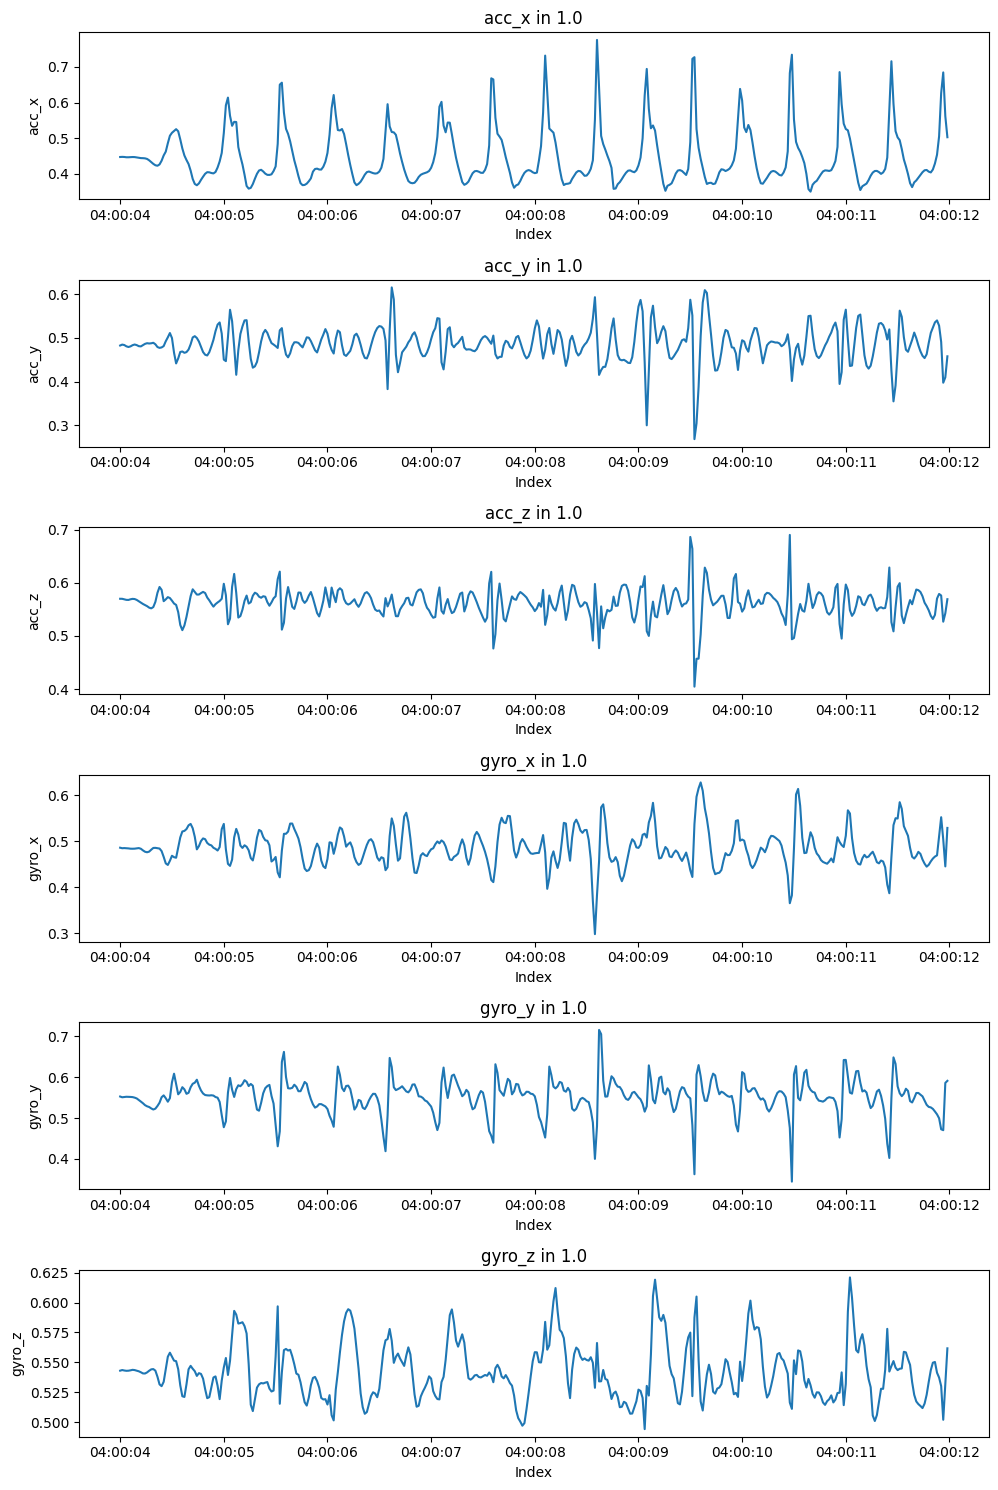

In [20]:
# 그래프 출력
fig, axes = plt.subplots(len(sensor_columns), 1, figsize=(10, 15))

for i, col in enumerate(sensor_columns):
    axes[i].plot(graph[col], label=col)
    axes[i].set_title(f'{col} in {graph["workout"].iloc[100]}')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


In [21]:
##데이터 증강
#def scale(data, scale_factor=1.2):
#    return data * scale_factor
#
#def time_warp(data, sigma=0.2):
#    original_time = np.arange(data.shape[0])
#    random_noise = np.random.normal(loc=0, scale=sigma, size=data.shape[0])
#    time_warped = original_time + random_noise
#    time_warped[0] = 0
#    time_warped[-1] = data.shape[0] - 1
#    time_warped = np.clip(time_warped, 0, data.shape[0] - 1)
#    interpolator = interp1d(time_warped, data, axis=0, kind='linear', fill_value="extrapolate")
#    return interpolator(original_time)
#
#def Data_Augmentation(df, df_index, minute=2):
#    X=[]
#    y=[]
#    for t in df_index.index:
#      sub = df.loc[t -pd.Timedelta(milliseconds=1):t - pd.Timedelta(minutes=minute)].values
#      X.append(sub[:,:-1])
#      y.append(sub[:,-1][0])
#    return np.array(X), np.array(y)
#

In [22]:
#스무딩 함수
def smoothing(data, window_size=100):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Low-pass filter 적용 함수
def lowpass_filter(data, cutoff=0.1, fs=100.0, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# High-pass filter 적용 함수
def highpass_filter(data, cutoff=0.1, fs=100.0, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

# Median filter 적용 함수
def median_filter(data, kernel_size=3):
    return medfilt(data, kernel_size)

In [23]:
# 각 컬럼에 대해 필터 적용
low_pass_filtered_data = {}
high_pass_filtered_data = {}
median_filtered_data = {}
for column in sensor_columns:
    low_pass_filtered_data[f'{column}'] = lowpass_filter(merge_train[column])
    high_pass_filtered_data[f'{column}'] = highpass_filter(merge_train[column])
    median_filtered_data[f'{column}'] = median_filter(merge_train[column])

low_pass_filtered_data['label'] = merge_train['workout']
high_pass_filtered_data['label'] = merge_train['workout']
median_filtered_data['label'] = merge_train['workout']

# 필터링된 데이터를 데이터프레임으로 변환
low_pass_filtered_data = pd.DataFrame(low_pass_filtered_data)
high_pass_filtered_data = pd.DataFrame(high_pass_filtered_data)
median_filtered_data = pd.DataFrame(median_filtered_data)

#인덱싱 일관화
low_pass_filtered_data.index = merge_train.index
high_pass_filtered_data.index = merge_train.index
median_filtered_data.index = merge_train.index

low_pass_filtered_data

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label
1970-01-01 04:00:00.000,0.444679,0.462920,0.576277,0.481466,0.557769,0.545352,1.0
1970-01-01 04:00:00.020,0.444684,0.463005,0.576251,0.481483,0.557755,0.545342,1.0
1970-01-01 04:00:00.040,0.444690,0.463090,0.576224,0.481499,0.557742,0.545331,1.0
1970-01-01 04:00:00.060,0.444696,0.463175,0.576197,0.481516,0.557728,0.545320,1.0
1970-01-01 04:00:00.080,0.444701,0.463261,0.576170,0.481532,0.557714,0.545310,1.0
...,...,...,...,...,...,...,...
1970-01-03 13:05:47.320,0.441613,0.475305,0.614319,0.484666,0.556002,0.542469,8.0
1970-01-03 13:05:47.340,0.441613,0.475305,0.614319,0.484666,0.556002,0.542469,8.0
1970-01-03 13:05:47.360,0.441613,0.475305,0.614319,0.484666,0.556002,0.542469,8.0
1970-01-03 13:05:47.380,0.441613,0.475305,0.614319,0.484666,0.556002,0.542469,8.0


In [24]:
# 각 컬럼에 대해 필터 적용
low_pass_filtered_test = {}
high_pass_filtered_test = {}
median_filtered_test = {}
for column in sensor_columns:
    low_pass_filtered_test[f'{column}'] = lowpass_filter(merge_test[column])
    high_pass_filtered_test[f'{column}'] = highpass_filter(merge_test[column])
    median_filtered_test[f'{column}'] = median_filter(merge_test[column])

# 필터링된 데이터를 데이터프레임으로 변환
low_pass_filtered_test = pd.DataFrame(low_pass_filtered_test)
high_pass_filtered_test = pd.DataFrame(high_pass_filtered_test)
median_filtered_test = pd.DataFrame(median_filtered_test)

#인덱싱 일관화
low_pass_filtered_test.index = merge_test.index
high_pass_filtered_test.index = merge_test.index
median_filtered_test.index = merge_test.index

low_pass_filtered_test

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
time,,,,,,
1970-01-01 02:00:00.000,0.441011,0.463384,0.609530,0.424971,0.552780,0.548963
1970-01-01 02:00:00.020,0.441017,0.463451,0.609510,0.425235,0.552781,0.548942
1970-01-01 02:00:00.040,0.441024,0.463518,0.609490,0.425499,0.552783,0.548922
1970-01-01 02:00:00.060,0.441030,0.463586,0.609470,0.425763,0.552785,0.548901
1970-01-01 02:00:00.080,0.441037,0.463653,0.609450,0.426026,0.552786,0.548880
...,...,...,...,...,...,...
1970-01-03 17:04:52.900,0.351508,0.488616,0.541642,0.485385,0.555196,0.540897
1970-01-03 17:04:52.920,0.351508,0.488616,0.541642,0.485385,0.555196,0.540897
1970-01-03 17:04:52.940,0.351508,0.488616,0.541642,0.485385,0.555196,0.540897


In [25]:
# def create_windows(df, window_size=2, step_size=0.01):
#     X = []
#     y = []
#     half_window = int(window_size / step_size)
#     for start in range(half_window, len(df) - half_window):
#         window = df.iloc[start - half_window: start + half_window].values
#         sensors = window[:,:-1]
#         X.append(sensors)
#         y.append(window[:,-1])
#     return np.array(X), np.array(y)

In [28]:
def create_windows(df, df_index, second=3):
    X=[]
    y=[]
    for t in df_index.index:
      sub = df.loc[t -pd.Timedelta(microseconds=1):t + pd.Timedelta(seconds=second)].values
      X.append(sub[:150,:-1])
      y.append(sub[:150,-1][0])
    return np.array(X), np.array(y)

In [29]:
X_raw, y_raw                =create_windows(merge_train,train_label)
X_lowpass, y_lowpass        =create_windows(low_pass_filtered_data,train_label)
X_highpass, y_highpass      =create_windows(high_pass_filtered_data,train_label)
X_medianpass, y_medianpass  =create_windows(median_filtered_data,train_label)
X_raw.shape

(5454, 150, 6)

In [30]:
# raw_scaler = []
# low_scaler = []
# high_scaler =[]
# medain_scaler =[]

# for i in range(6):
#   raw_scaler.append(MinMaxScaler())
#   low_scaler.append(MinMaxScaler())
#   high_scaler.append(MinMaxScaler())
#   medain_scaler.append(MinMaxScaler())

# for a,i in enumerate(sensor_columns):
#   X_raw        = raw_scaler[a].fit_transform(np.array(X_raw[i]).reshape(len(X_raw[i],1)))
#   X_lowpass    = low_scaler[a].fit_transform(np.array(X_lowpass[i]).reshape(len(X_lowpass[i],1)))
#   X_highpass   = high_scaler[a].fit_transform(np.array(X_highpass[i]).reshape(len(X_highpass[i],1)))
#   X_medianpass = medain_scaler[a].fit_transform(np.array(X_medianpass[i]).reshape(len(X_medianpass[i],1)))

In [31]:
def create_test_windows(df, df_index, second=3, max_length=None):
    X = []
    for t in df_index.index:
        sub = df.loc[t -pd.Timedelta(microseconds=1):t + pd.Timedelta(seconds=second)].values
        X.append(sub[:150, :])
    return np.array(X)

In [32]:
test_X_raw       =create_test_windows(merge_test,test_label)
test_X_lowpass   =create_test_windows(low_pass_filtered_test,test_label)
test_X_highpass  =create_test_windows(high_pass_filtered_test,test_label)
test_X_medianpass=create_test_windows(median_filtered_test,test_label)
test_X_raw.shape

(11489, 150, 6)

In [33]:
# for a,i in enumerate(sensor_columns):
#   test_X_raw        = raw_scaler[a].fit_transform(np.array(test_X_raw[i]).reshape(len(test_X_raw[i],1)))
#   test_X_lowpass    = low_scaler[a].fit_transform(np.array(test_X_lowpass[i]).reshape(len(test_X_lowpass[i],1)))
#   test_X_highpass   = high_scaler[a].fit_transform(np.array(test_X_highpass[i]).reshape(len(test_X_highpass[i],1)))
#   test_X_medianpass = medain_scaler[a].fit_transform(np.array(test_X_medianpass[i]).reshape(len(test_X_medianpass[i],1)))

In [34]:
# 각 데이터에 새로운 차원 추가 (맨 끝에 차원을 추가함)
X_raw_expanded = np.expand_dims(X_raw, axis=-1)
X_lowpass_expanded = np.expand_dims(X_lowpass, axis=-1)
X_highpass_expanded = np.expand_dims(X_highpass, axis=-1)
X_medianpass_expanded = np.expand_dims(X_medianpass, axis=-1)

# 새로운 차원을 따라 합치기 (axis=-1로 설정)
X = np.concatenate([X_raw_expanded, X_lowpass_expanded, X_highpass_expanded, X_medianpass_expanded], axis=-1)
y = y_raw
X.shape

(5454, 150, 6, 4)

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape[1], X_train.shape[2], X_train.shape[3])

150 6 4


In [36]:
# 각 데이터에 새로운 차원 추가 (맨 끝에 차원을 추가함)
test_X_raw_expanded = np.expand_dims(test_X_raw, axis=-1)
test_X_lowpass_expanded = np.expand_dims(test_X_lowpass, axis=-1)
test_X_highpass_expanded = np.expand_dims(test_X_highpass, axis=-1)
test_X_medianpass_expanded = np.expand_dims(test_X_medianpass, axis=-1)

# 새로운 차원을 따라 합치기 (axis=-1로 설정)
test_data = np.concatenate([test_X_raw_expanded, test_X_lowpass_expanded, test_X_highpass_expanded, test_X_medianpass_expanded], axis=-1)

In [37]:
test_data.shape

(11489, 150, 6, 4)

# Final Model Specification
아래에는 위 전 과정을 거쳐서 최종적으로 선정된 모델을 정의하고 훈련할 것

In [ ]:
# Create the model
model = Sequential()

# Add the layers
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
model.add(MaxPooling2D(pool_size=(2, 1)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 1)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

# 모델 컴파일
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val))

# 모델 평가
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

Epoch 1/200
137/137 [==============================] - 7s 46ms/step - loss: 2.0114 - accuracy: 0.3605 - val_loss: 1.7578 - val_accuracy: 0.3703
Epoch 2/200
137/137 [==============================] - 6s 44ms/step - loss: 1.5224 - accuracy: 0.4671 - val_loss: 1.0461 - val_accuracy: 0.6159
Epoch 3/200
137/137 [==============================] - 6s 45ms/step - loss: 1.1089 - accuracy: 0.5978 - val_loss: 0.7779 - val_accuracy: 0.7250
Epoch 4/200
137/137 [==============================] - 6s 46ms/step - loss: 0.8798 - accuracy: 0.6761 - val_loss: 0.6464 - val_accuracy: 0.7736
Epoch 5/200
137/137 [==============================] - 6s 45ms/step - loss: 0.7501 - accuracy: 0.7311 - val_loss: 0.4797 - val_accuracy: 0.8423
Epoch 6/200
137/137 [==============================] - 6s 46ms/step - loss: 0.6582 - accuracy: 0.7719 - val_loss: 0.3932 - val_accuracy: 0.8689
Epoch 7/200
137/137 [==============================] - 6s 46ms/step - loss: 0.5664 - accuracy: 0.8013 - val_loss: 0.4079 - val_accuracy:

In [ ]:
# Balanced Accuracy 계산
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
balanced_acc = balanced_accuracy_score(y_val, y_val_pred_classes)
print(f"Validation Balanced Accuracy: {balanced_acc}")

In [ ]:
test_predict = model.predict(test_data)
test_predict = np.argmax(test_predict, axis=1)
test_predict

# Generate Submission
아래에는 Kaggle에 제출한 결과를 PC에 저장하는 코드를 넣을 것.
노트북 실행 후 아래의 코드를 통해 생성된 결과가 Kaggle에 제출된 결과와 일치해야 함.

In [ ]:
submmision  = pd.read_csv(r'/Users/gokyulueau/Downloads/sample_submission.csv',index_col='id',usecols=['id','workout'])

In [ ]:
SUBMIT = pd.DataFrame({
    'id':submmision.sort_index().index ,
    'label':test_predict
})
SUBMIT.to_csv('./submission.csv', index=False)

In [ ]:
!kaggle competitions submit -c 2024-knu-ml-team-asmt -f submission.csv -m "이정민_19 : 0617.1 cnn 200epoch 3dense 20msSampling"